In [2]:
# Load Data
import pandas as pd
filename='iris.csv'
names=['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pd.read_csv(filename,names=names)

In [ ]:
# Summalize the Dataset

In [3]:
#shape
print("shape",dataset.shape)

('shape', (150, 5))


In [4]:
# Head
print('head',dataset.head(10))

('head',    sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa)


In [5]:
# Statistical Summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Data Visualization

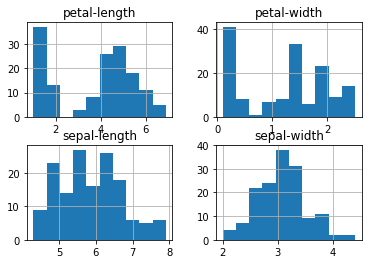

In [7]:
# Univariate plots
# Histograms
import matplotlib.pyplot as plt
dataset.hist()
plt.show()
# It looks like perhaps two of the input variable has gaussian distibution

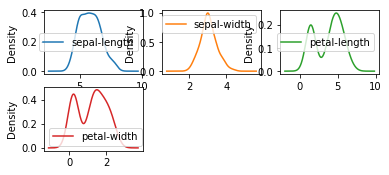

In [12]:
# Density Visualization for smoothe curve
dataset.plot(kind='density',subplots=True,sharex=False,layout=(3,3))
plt.show()
# As per Below Visualization sepal-length and width looks like gaussian distribution

In [13]:
# split dataset into input and output attributes
array=dataset.values
x=array[:,:-1]
y=array[:,-1]
# Split input and output variable as train and test set
val=0.80
val1=0.20
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=val,test_size=val1,random_state=seed)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Logisitic : 0.880000 (0.148474)
K-NN : 0.933333 (0.084327)
Naive_bayes : 0.946667 (0.058119)
SVC : 0.953333 (0.052068)
decision_tree : 0.953333 (0.060000)
random_forest : 0.926667 (0.120922)


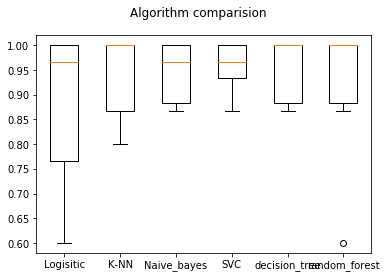

In [14]:
# Spot Check and Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
n_tree=10
models=[]
models.append(("Logisitic",LogisticRegression()))
models.append(("K-NN",KNeighborsClassifier()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('SVC',SVC()))
models.append(('decision_tree',DecisionTreeClassifier()))
models.append(('random_forest',RandomForestClassifier(n_estimators=n_tree)))

# Evaluate Each Model in turn
names=[]
predictions=[]
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for name, model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x,y,cv=fold)
    names.append(name)
    predictions.append(result)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)


# Visualizing the Each model accuracy
fig=plt.figure()
fig.suptitle('Algorithm comparision')
axis=fig.add_subplot(111)
plt.boxplot(predictions)
axis.set_xticklabels(names)
plt.show()

In [15]:
# As per Above Compare Predictions we got support vector classifier giving better accuracy
# Making Predictions on validation dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("accuracy score",accuracy_score(y_test,y_pred))
print("Confusion matrix",confusion_matrix(y_test,y_pred))

('accuracy score', 0.9666666666666667)
('Confusion matrix', array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64))
